# Bayesian analyses and MCMC

## Defining priors

In [1]:
from likelihood import Priors, LikelihoodFunction
from equations import DM_EXT_model

model = DM_EXT_model()

# Defining the prior intervals manually
#intervals_constant = [(0, 1), (20, 100)]  # Omega_m, H_0, omega_0
intervals_constant = [(20, 100), (-3, 0)]  # H_0, omega_0
intervals_p2 = [(20, 100), (-3, 0), (-3, 3)]  # H_0, omega_0, omega_a
"""intervals_p3 = [(0, 1), (20, 100), (-3, 0), (-3, 3)]  # Omega_m, H_0, omega_0, omega_a
"""

# Creating specific instances of the priors
#P_constant = Priors(['\\Omega_m', 'H_0', '\\omega_0'], intervals_constant)
P_constant = Priors(['H_0', '\\omega_0'], intervals_constant)
P_p2 = Priors(['H_0', '\omega_0', '\omega_a'], intervals_p2)
#P_p3 = Priors(['\Omega_m', 'H_0',  '\omega_0', '\omega_a'], intervals_p3)

# Creating an instance of the likelihood model
LF_constant = LikelihoodFunction(
    lambda z, H_0, omega_0: model.DM_ext_th(
        z=z,
        f_IGM=0.83,
        DM_host_0=157,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=H_0,
        omega_0=omega_0,
        cosmo_type='non_standard',
        param_type='constant'
    )
)

LF_p2 = LikelihoodFunction(
    lambda z, omega_0, omega_a, H_0: model.DM_ext_th(
        z=z,
        f_IGM=0.83,
        DM_host_0=157,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=H_0,
        omega_0=omega_0,  
        omega_a=omega_a,
        cosmo_type='non_standard',
        param_type='constant'
    )
)

"""LF_p3 = LikelihoodFunction(
    lambda z, f_IGM, DM_host_0, alpha: model.DM_ext_th(
        z=z,
        f_IGM=f_IGM,
        DM_host_0=DM_host_0,
        model_type='p3',
        Omega_b=0.0408,  
        Omega_m=0.3,    
        H_today=70.0,    
        param=alpha
    )
)"""

<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:16: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_19324/2762663095.py:16: SyntaxWarning: invalid escape sequence '\o'
  P_p2 = Priors(['H_0', '\omega_0', '\omega_a'], intervals_p2)
/tmp/ipykernel_19324/2762663095.py:16: SyntaxWarning: invalid escape sequence '\o'
  P_p2 = Priors(['H_0', '\omega_0', '\omega_a'], intervals_p2)


"LF_p3 = LikelihoodFunction(\n    lambda z, f_IGM, DM_host_0, alpha: model.DM_ext_th(\n        z=z,\n        f_IGM=f_IGM,\n        DM_host_0=DM_host_0,\n        model_type='p3',\n        Omega_b=0.0408,  \n        Omega_m=0.3,    \n        H_today=70.0,    \n        param=alpha\n    )\n)"

## Preparing the samples

### Analysis for 16 FRBs

In [2]:
from obs_data import FRB_data
import ultranest

# Instantiate the FRB_data class for 16 FRBs
frb_data_16 = FRB_data(n_frb=16)

# Call the select_data method to get the observed data
z_obs_16, DM_obs_ext_16, DM_obs_ext_error_16 = frb_data_16.select_data()

z_values_16 = z_obs_16
dm_ext_obs_16 = DM_obs_ext_16
dm_ext_errors_16 =  DM_obs_ext_error_16

# Configuring the ultranest samplers
sampler_constant_16 = ultranest.ReactiveNestedSampler(
    P_constant.param_names,
    lambda params: LF_constant.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_constant.prior_transform
)

sampler_p2_16 = ultranest.ReactiveNestedSampler(
    P_p2.param_names,
    lambda params: LF_p2.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_p2.prior_transform
)

"""sampler_p3_16 = ultranest.ReactiveNestedSampler(
    P_p3.param_names,
    lambda params: LF_p3.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_p3.prior_transform
)"""

'sampler_p3_16 = ultranest.ReactiveNestedSampler(\n    P_p3.param_names,\n    lambda params: LF_p3.log_likelihood(\n        params,\n        z_values=z_values_16,\n        y_obs=dm_ext_obs_16,\n        errors=dm_ext_errors_16\n    ),\n    P_p3.prior_transform\n)'

### Analysis for 50 FRBs

In [3]:
# Instantiate the FRB_data class for 50 FRBs
frb_data_50 = FRB_data(n_frb=50)

# Call the select_data method to get the observed data
z_obs_50, DM_obs_ext_50, error_plus_50, error_minus_50 = frb_data_50.select_data()

z_values_50 = z_obs_50
dm_ext_obs_50 = DM_obs_ext_50
dm_error_plus_50 =  error_plus_50
dm_error_minus_50 =  error_minus_50

# Configuring the ultranest samplers
sampler_constant_50 = ultranest.ReactiveNestedSampler(
    P_constant.param_names,
    lambda params: LF_constant.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_constant.prior_transform
)

sampler_p2_50 = ultranest.ReactiveNestedSampler(
    P_p2.param_names,
    lambda params: LF_p2.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_p2.prior_transform
)

"""sampler_p3_50 = ultranest.ReactiveNestedSampler(
    P_p3.param_names,
    lambda params: LF_p3.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_p3.prior_transform
)"""

'sampler_p3_50 = ultranest.ReactiveNestedSampler(\n    P_p3.param_names,\n    lambda params: LF_p3.log_likelihood(\n        params,\n        z_values=z_values_50,\n        y_obs=dm_ext_obs_50,\n        err_pos=error_plus_50,\n        err_neg=error_minus_50\n    ),\n    P_p3.prior_transform\n)'

In [4]:
result1_16 = sampler_constant_16.run(min_num_live_points=400)
sampler_constant_16.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+02  .24 [-553.2525..-553.2525]*| it/evals=4000/5789 eff=74.2253% N=400  
[ultranest] Likelihood function evaluations: 5793
[ultranest]   logZ = -558.7 +- 0.08634
[ultranest] Effective samples strategy satisfied (ESS = 1580.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.11 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.

logZ = -558.650 +- 0.151
  single instance: logZ = -558.650 +- 0.105
  bootstrapped   : logZ = -558.657 +- 0.150
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    H_0                 : 57.7  │ ▁  ▁▁▁▁▁▁▁▂▂▃▃▄▅▅▇▇▇▇▇▇▇▆▅▄▃▂▁▁▁▁▁▁▁▁ │76.2      67.8 +- 2.3
    \omega_0            : -2.40 │ ▁  ▁  ▁▁▁▁▁▁▁▁▁▂▃▂▃▄▆▆▇▇▇▇▇▆▅▃▂▂▁▁▁ ▁ │-0.38     -1.14 +- 0.23



In [5]:
result1_50 = sampler_constant_50.run(min_num_live_points=400)
sampler_constant_50.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+03  345.37 [-6345.3816..-6345.3816]*| it/evals=4741/6765 eff=74.4855% N=400 
[ultranest] Likelihood function evaluations: 6781
[ultranest]   logZ = -6353 +- 0.08368
[ultranest] Effective samples strategy satisfied (ESS = 1613.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.

logZ = -6352.651 +- 0.167
  single instance: logZ = -6352.651 +- 0.125
  bootstrapped   : logZ = -6352.639 +- 0.166
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    H_0                 : 74.10 │ ▁  ▁▁▁▁▁▂▃▃▃▅▅▇▇▇▇▆▅▄▄▃▂▁▁▁▁▁▁      ▁ │82.21     77.71 +- 0.85
    \omega_0            : -1.765│ ▁▁▁▁▁▁▁▁▂▂▃▄▄▅▆▆▇▇▇▇▇▇▆▄▄▃▃▂▂▁▁▁▁▁▁▁▁ │-1.179    -1.476 +- 0.076



In [6]:
result2_16 = sampler_p2_16.run(min_num_live_points=400)
sampler_p2_16.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5e+03  303.66 [-5303.8003..-5303.8000]*| it/evals=5461/8333 eff=68.8390% N=400 
[ultranest] Likelihood function evaluations: 8341
[ultranest]   logZ = -5313 +- 0.09571
[ultranest] Effective samples strategy satisfied (ESS = 2169.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.10 tail:0.01 total:0.10 required:<0.50
[ultranest] done iterating.

logZ = -5312.819 +- 0.181
  single instance: logZ = -5312.819 +- 0.133
  bootstrapped   : logZ = -5312.813 +- 0.181
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    H_0                 : 20.00 │▇▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▁▁    ▁▁ ▁ │27.45     20.60 +- 0.65
    \omega_0            : -3.00 │▆▅▆▆▅▇▆▅▅▆▅▅▆▅▇▅▆▇▅▆▆▆▆▅▅▅▇▆▇▆▅▅▅▇▆▅▆▆▅│-0.00     -1.49 +- 0.86
    \omega_a            

In [7]:
result2_50 = sampler_p2_50.run(min_num_live_points=400)
sampler_p2_50.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+04  -24351.93 [-24352.0738..-24352.0735]*| it/evals=6360/9795 eff=67.6956% N=400 
[ultranest] Likelihood function evaluations: 9806
[ultranest]   logZ = -2.436e+04 +- 0.09008
[ultranest] Effective samples strategy satisfied (ESS = 2169.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.

logZ = -24363.336 +- 0.230
  single instance: logZ = -24363.336 +- 0.153
  bootstrapped   : logZ = -24363.361 +- 0.230
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    H_0                 : 20.00 │▇▆▄▃▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁  ▁            ▁ │22.72     20.21 +- 0.21
    \omega_0            : -3.00 │▅▅▆▅▅▅▅▆▄▆▆▄▅▅▆▅▆▆▅▅▅▅▆▆▅▅▄▆▆▅▇▇▅▅▆▆▅▄▆│-0.00     -1.49 +- 0.86
    \omega_

In [ ]:
result3_16 = sampler_p3_16.run(min_num_live_points=400)
sampler_p3_16.print_results()

In [ ]:
result3_50 = sampler_p3_50.run(min_num_live_points=400)
sampler_p3_50.print_results()

In [9]:
from getdist import plots, MCSamples

# Extraindo amostras dos resultados
samples1_16 = result1_16['samples']
samples2_16 = result2_16['samples']
#samples3_16 = result3_16['samples']

samples1_50 = result1_50['samples']
samples2_50 = result2_50['samples']
#samples3_50 = result3_50['samples']

# Criando objetos MCSamples com os dados
labels1 = P_constant.param_names
names1 = P_constant.param_names
mcsamples1_16 = MCSamples(samples=samples1_16, names=names1, labels=labels1)
mcsamples1_50 = MCSamples(samples=samples1_50, names=names1, labels=labels1)

labels2 = P_p2.param_names
names2 = P_p2.param_names
mcsamples2_16 = MCSamples(samples=samples2_16, names=names2, labels=labels2)
mcsamples2_50 = MCSamples(samples=samples2_50, names=names2, labels=labels2)

"""mcsamples3_16 = MCSamples(samples=samples3_16, names=names2, labels=labels2)
mcsamples3_50 = MCSamples(samples=samples3_50, names=names2, labels=labels2)"""

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


'mcsamples3_16 = MCSamples(samples=samples3_16, names=names2, labels=labels2)\nmcsamples3_50 = MCSamples(samples=samples3_50, names=names2, labels=labels2)'

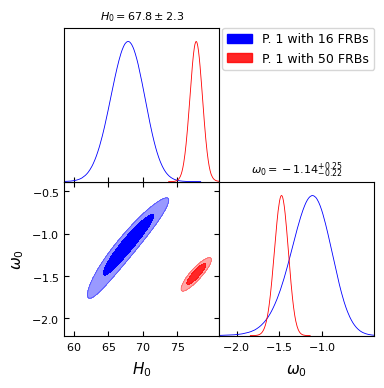

In [10]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples1_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples1_50.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples1_16, mcsamples1_50], filled=True, contour_colors=['blue', 'red'], 
                legend_labels=['P. 1 with 16 FRBs', 'P. 1 with 50 FRBs'], 
                title_limit=1)
"""g.triangle_plot([mcsamples1_50], filled=True, contour_colors=['red'], 
                legend_labels=['P. 1 with 50 FRBs'], 
                title_limit=1)"""
g.export('Figuras/H_p1.png', dpi=600)

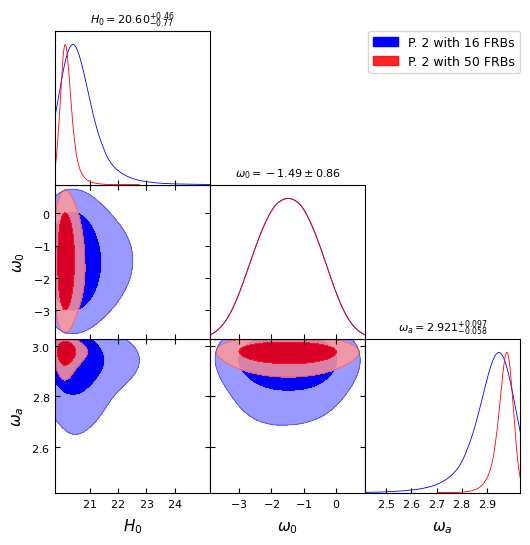

In [11]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples2_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples2_50.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples2_16, mcsamples2_50], filled=True, contour_colors=['blue', 'red'], 
                legend_labels=['P. 2 with 16 FRBs', 'P. 2 with 50 FRBs'], 
                title_limit=1)
g.export('Figuras/H_p2.png', dpi=600)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples3_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples3_50.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples3_16, mcsamples3_50], filled=True, contour_colors=['blue', 'red'], 
                legend_labels=['P. 3 with 16 FRBs', 'P. 3 with 50 FRBs'], 
                title_limit=1)
g.export('Figuras/H_p3.png', dpi=600)

In [ ]:
from ultranest.plot import PredictionBand
from equations import DM_EXT_model
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.errorbar(x=z_values_16, y=dm_ext_obs_16, fmt='ro', alpha=0.6, capsize=3, color='red', label='Data', ms=4)

z_test = np.linspace(0, 1, 100)

band = PredictionBand(z_test)
model_fit = DM_EXT_model()
# go through the solutions
for f_IGM, DM_host_0, alpha  in sampler_p2_16.results['samples']:
    # compute for each time the y value
    band.add(model_fit.DM_ext_th(z=z_test, f_IGM=f_IGM,
        DM_host_0=DM_host_0,
        model_type='p2',    
        param=alpha))

band.line(color='k', linestyle='-', label='Parameterization 3', linewidth=1.5)
# add 1 sigma quantile
band.shade(color='green', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
band.shade(q=0.49, color='green', alpha=0.2)

plt.legend()
plt.savefig('Figuras/H_bestfit.png', format='png', dpi=600)

In [ ]:
plt.figure()
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.errorbar(x=z_values_50, y=dm_ext_obs_50, fmt='ro', alpha=0.6, color='red', label='Data', ms=4)

# go through the solutions
for f_IGM, DM_host_0, alpha  in sampler_p2_50.results['samples']:
    # compute for each time the y value
    band.add(model_fit.DM_ext_th(z=z_test, f_IGM=f_IGM,
        DM_host_0=DM_host_0,
        model_type='p2',    
        param=alpha))

band.line(color='k', linestyle='-', label='Parameterization 3', linewidth=1.5)
# add 1 sigma quantile
band.shade(color='green', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
band.shade(q=0.49, color='green', alpha=0.2)

plt.legend()
plt.savefig('Figuras/H_bestfit_50.png', format='png', dpi=600)